In [25]:

import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import OneHotEncoder

plt.rcParams['text.usetex'] = True
df0 = pd.read_excel('CKD_agri_data.xls')


# Pre-Processing

In [26]:
df0.columns = (
    df0.columns
    .str.strip()
    .str.lower()
    .str.replace(' ', '_')
    .str.replace('>', 'gt')
    .str.replace('-', '_')
)


In [27]:
df0

,scr_dat,zone,dist,cluster,hh,gebder,dob,religion,education,marital_status,...,urine_protein_sample_2,urine_blood_sample_2,creatinine_sample_2,ckd_epi_sample_2,gfr_cat_sample_2,albuminuria_sample_2,hematuria_sample_2,ckd_calculation_sample_2,ckd_final,ckdu
0,2023-09-11,SOUTHERN ZONE,Madurai,CKDU001,1,Male,1953-09-11 00:00:00,Hindu,Primary,Married,...,Nil,Absent,1.1,70.442307,0.0,0.0,0.0,0.0,0,No CKD
1,1900-01-02,SOUTHERN ZONE,Madurai,CKDU001,10,Male,1960-10-05 00:00:00,Hindu,Primary,Married,...,SNG,SNG,SNG,NaN,0.0,0.0,0.0,0.0,0,No CKD
2,2023-09-11,SOUTHERN ZONE,Madurai,CKDU001,11,Male,1969-07-17 00:00:00,Hindu,Primary,Married,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,No CKD
3,2023-09-11,SOUTHERN ZONE,Madurai,CKDU001,12,Male,1983-07-13 00:00:00,Hindu,Primary,Married,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,No CKD
4,2023-09-11,SOUTHERN ZONE,Madurai,CKDU001,13,Male,1958-06-07 00:00:00,Hindu,Primary,Married,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,No CKD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3345,2023-09-09,CAUVERY DELTA ZONE,Tiruvarur,CKDU125,5,Female,2023-09-09 00:00:00,Hindu,Primary,Married,...,SNG,SNG,SNG,NaN,0.0,0.0,0.0,0.0,0,No CKD
3346,2023-09-09,CAUVERY DELTA ZONE,Tiruvarur,CKDU125,6,Female,2023-09-09 00:00:00,Hindu,Primary,Married,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,No CKD
3347,2023-09-09,CAUVERY DELTA ZONE,Tiruvarur,CKDU125,7,Female,1973-09-09 00:00:00,Hindu,Primary,Married,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,No CKD
3348,2023-09-09,CAUVERY DELTA ZONE,Tiruvarur,CKDU125,8,Male,1971-07-01 00:00:00,Hindu,Primary,Married,...,SNG,SNG,SNG,NaN,0.0,0.0,0.0,0.0,0,No CKD


## Column wise Missing Fraction

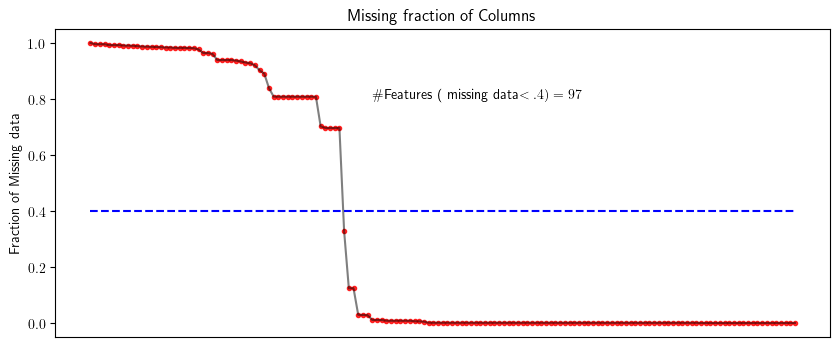

In [28]:
missing_frac = df0.isnull().mean().sort_values(ascending=False)



plt.figure(figsize=(10, 4))
plt.plot(missing_frac.values, 'o', alpha=0.8, color='red', markersize=3)
plt.plot(missing_frac.values, '-', alpha=0.5, color='black', markersize=3)
plt.xticks([])
plt.ylabel('Fraction of Missing data')
plt.hlines(0.4, 0, len(missing_frac)-1, colors='blue', linestyles='dashed')
plt.text(60, .8, rf'\#Features ( missing data$<.4)= {np.sum(missing_frac<.4)}$')
plt.title('Missing fraction of Columns')
plt.show()



In [29]:
# for col, frac in missing_frac.items():
#     if frac < 0.4:
#         print(f"{col}: {frac:.2f}")


In [30]:

cols_to_keep = missing_frac[missing_frac < 0.4].keys()
df1 = df0.loc[:, cols_to_keep]
# df1


## Row wise missing fraction


<>:10: SyntaxWarning: invalid escape sequence '\#'
<>:10: SyntaxWarning: invalid escape sequence '\#'
C:\Users\aksha\AppData\Local\Temp\ipykernel_20776\2876202950.py:10: SyntaxWarning: invalid escape sequence '\#'
  plt.text(2000, .5, f'\#Rows ( missing data$<.2)= {np.sum(df2['missing_frac_row']<.2)}$')


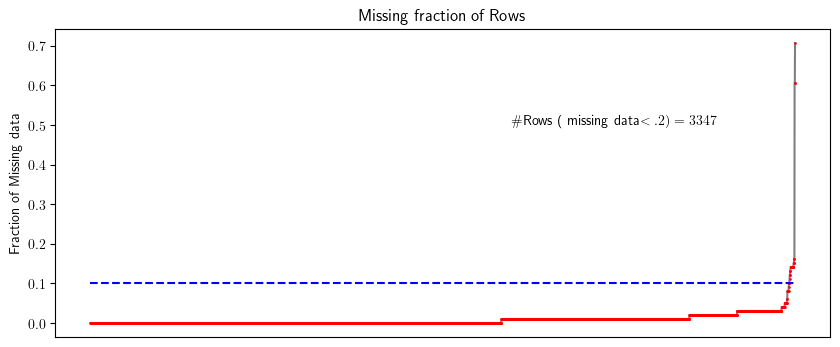

In [31]:

df1['missing_frac_row'] = df1.isnull().mean(axis=1)
df2 = df1.sort_values(by='missing_frac_row', ascending=True)

plt.figure(figsize=(10, 4))
plt.plot(df2['missing_frac_row'].values, '-', alpha=0.5, color='black', markersize=3)
plt.plot(df2['missing_frac_row'].values, 'o', alpha=0.8, color='red', markersize=1)
plt.xticks([])
plt.ylabel('Fraction of Missing data')
plt.hlines(0.1, 0, len(df2['missing_frac_row'])-1, colors='blue', linestyles='dashed')
plt.text(2000, .5, f'\#Rows ( missing data$<.2)= {np.sum(df2['missing_frac_row']<.2)}$')
plt.title('Missing fraction of Rows')
plt.show()




In [32]:
faulty_rows = np.sum(df2['missing_frac_row']<.2)
df2 = df2.iloc[-faulty_rows :]

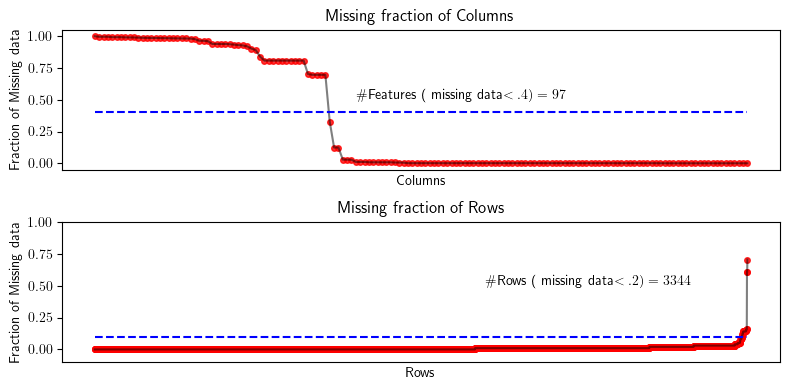

In [33]:
# Out

fig, axes = plt.subplots(2,1, figsize=(8, 4))

# Columns
axes[0].plot(missing_frac.values, 'o', alpha=0.8, color='red', markersize=4)
axes[0].plot(missing_frac.values, '-', alpha=0.5, color='black')
axes[0].set_xticks([])
axes[1].set_ylim(-.1,1)
axes[0].set_xlabel('Columns')
axes[0].set_ylabel('Fraction of Missing data')
axes[0].hlines(0.4, 0, len(missing_frac)-1, colors='blue', linestyles='dashed')
axes[0].text(60, .5, rf'\#Features ( missing data$<.4)= {np.sum(missing_frac<.4)}$')
axes[0].set_title('Missing fraction of Columns')

# Rows
axes[1].plot(df2['missing_frac_row'].values, 'o', alpha=0.8, color='red', markersize=4)
axes[1].plot(df2['missing_frac_row'].values, '-', alpha=0.5, color='black')
axes[1].set_xticks([])
axes[1].set_xlabel('Rows')
axes[1].set_ylabel('Fraction of Missing data')
axes[1].set_ylim(-.1,1)
axes[1].hlines(0.1, 0, len(df2['missing_frac_row'])-1, colors='blue', linestyles='dashed')
# Fix here:
axes[1].text(2000, .5, rf'\#Rows ( missing data$<.2)= {np.sum(df2["missing_frac_row"]<.2)}$')
axes[1].set_title('Missing fraction of Rows')

plt.tight_layout()
plt.savefig('pp_frac.pdf')
plt.show()


## Clean-up

In [34]:
df3 = df2 #reset point

In [37]:
# renaming the `ht` columns
cols = df3.columns.tolist()
ht_count = 1
new_cols = []
for col in cols:
    if col == 'ht':
        new_cols.append(f'ht{ht_count}')
        ht_count += 1
    else:
        new_cols.append(col)
df3.columns = new_cols


# replacing nil with 0
df3['urine_blood'].replace('nil', 0)
df3['urine_albumin'].replace('nil', 0)


# replacing nil with 0
df3['urine_blood'].replace(0, df3['urine_blood'].median)
df3['urine_albumin'].replace(0, df3['urine_albumin'].median)
print('done!')

done!


## Imputation and Scaling

In [10]:
numeric_cols = []
categor_cols = []
left_cols = []
for col in df3.columns:
    coerced = pd.to_numeric(df3[col], errors='coerce')
    n_total = len(coerced)
    n_numeric = coerced.notna().sum()
    numeric_fraction = n_numeric / n_total
    
    if numeric_fraction > 0.01:  
        df3[col] = coerced
        # print(f"Column '{col}' {numeric_fraction:.2%} ")
        numeric_cols.append(col)
    elif numeric_fraction <0.01 and numeric_fraction!=0:
        # print(f"Column '{col}' left unchanged (only {numeric_fraction:.2%} numeric values).")
        left_cols.append(col)
    else:
        categor_cols.append(col)

numeric_cols = df3.select_dtypes(include=['number']).columns.tolist()
categorical_cols = df3.select_dtypes(exclude=['number']).columns.tolist()

In [11]:
print(f'Numeric Features = {len(numeric_cols)}')
print(f'Categoric Features = {len(categor_cols)}')
print(f'Unchanged Features = {len(left_cols)}')

Numeric Features = 46
Categoric Features = 54
Unchanged Features = 0


In [ ]:
print(f'Numeric Features = {len(numeric_cols)}')

# Classification

In [2]:
dfnum = pd.read_csv('numeric_data_agri.csv')
# dfnum['ckd_code_sample_1']

## Random Forest

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay


In [ ]:
df_clean =dfnum.dropna(subset=['ckd_code_sample_1'])
X =df_clean.drop(columns=['ckd_code_sample_1', 'ckd__probable_sample_1', 'ckd_epi_sample_1' ])
y =df_clean['ckd_code_sample_1']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y
)

clf = RandomForestClassifier(
    n_estimators=100, 
    random_state=42, 
    class_weight='balanced'  
)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))




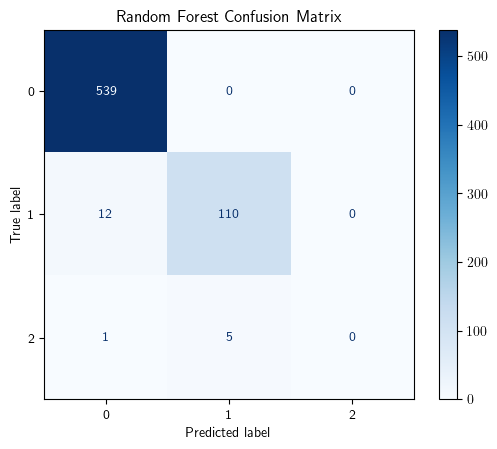

In [ ]:

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues', values_format='d')

plt.title("Random Forest Confusion Matrix")
plt.show()


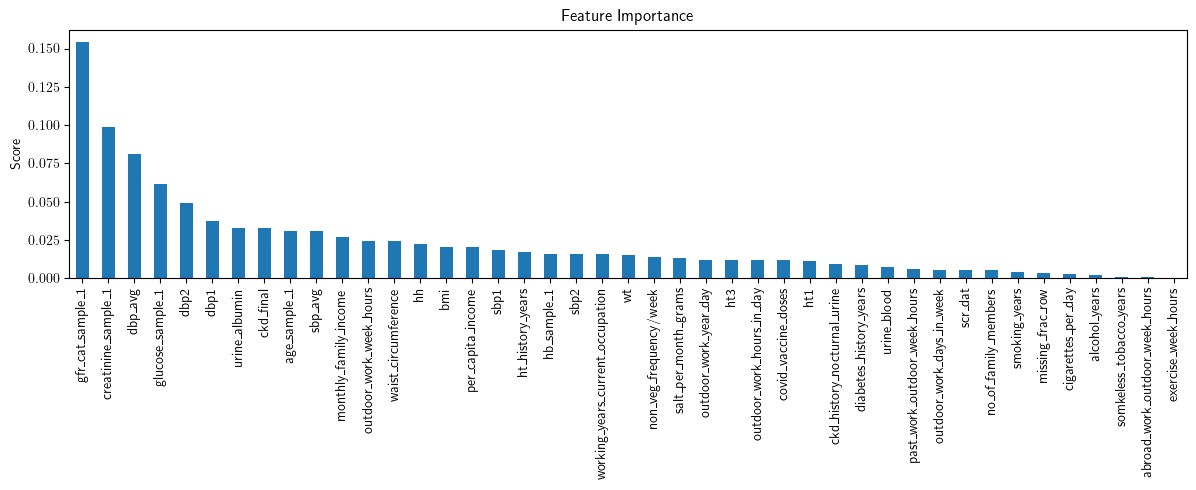

In [105]:

importances = pd.Series(clf.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).plot(kind='bar', figsize=(12, 5))
plt.title("Feature Importance")
plt.ylabel("Score")
plt.tight_layout()
plt.show()


## Dense Neural Netowrk

In [11]:
from sklearn.model_selection import train_test_split

In [6]:
df_clean =dfnum.dropna(subset=['ckd_code_sample_1'])
X =df_clean.drop(columns=['ckd_code_sample_1', 'ckd__probable_sample_1', 'ckd_epi_sample_1' ])
y =df_clean['ckd_code_sample_1']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y
)

In [10]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # or Dense(num_classes, activation='softmax') for multi-class
])

model.compile(optimizer=Adam(learning_rate=1e-1),
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))


Epoch 1/20


c:\Users\aksha\.conda\envs\py311\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7968 - loss: 0.5437 - val_accuracy: 0.8081 - val_loss: 0.5017
Epoch 2/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8070 - loss: 0.5067 - val_accuracy: 0.8081 - val_loss: 0.5026
Epoch 3/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8126 - loss: 0.5015 - val_accuracy: 0.8081 - val_loss: 0.5057
Epoch 4/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8056 - loss: 0.5077 - val_accuracy: 0.8081 - val_loss: 0.5016
Epoch 5/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7936 - loss: 0.5265 - val_accuracy: 0.8081 - val_loss: 0.5017
Epoch 6/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8081 - loss: 0.5002 - val_accuracy: 0.8081 - val_loss: 0.5024
Epoch 7/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8026 - loss: 0.5110 - val_accuracy: 0.8081 - val_loss: 0.5018
Epoch 8/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8037 - loss: 0.5113 - val_accuracy: 0.8081 - val_loss: 0.5018
Epo